In [79]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import Image
from IPython.core.display import HTML

In [80]:
data = pd.read_csv("~/Desktop/TTRUS.csv")
city = pd.read_csv("~/Desktop/TTRCity.csv")

Making a graph object out of edge list

In [81]:
g = ig.Graph.DataFrame(data, directed=False,use_vids=False)

Creating a series of tuples that will be used to appropriately position the nodes on my visuals

In [82]:
positions=pd.DataFrame({'long': list(city['Longitude']),'lat': list(city['Latitude'])}, index=city.iloc[:,0])

posTuple = [tuple(x) for x in positions.values]
posTuple=pd.Series(data=posTuple, index=positions.index)

posList = []
for i in g.vs:
    posList.append(posTuple[i["name"]])

In [83]:
layout = ig.Layout(coords=posList)

colList = []
for i in g.es:
    colList.append(mcolors.to_hex(i["Color"]))

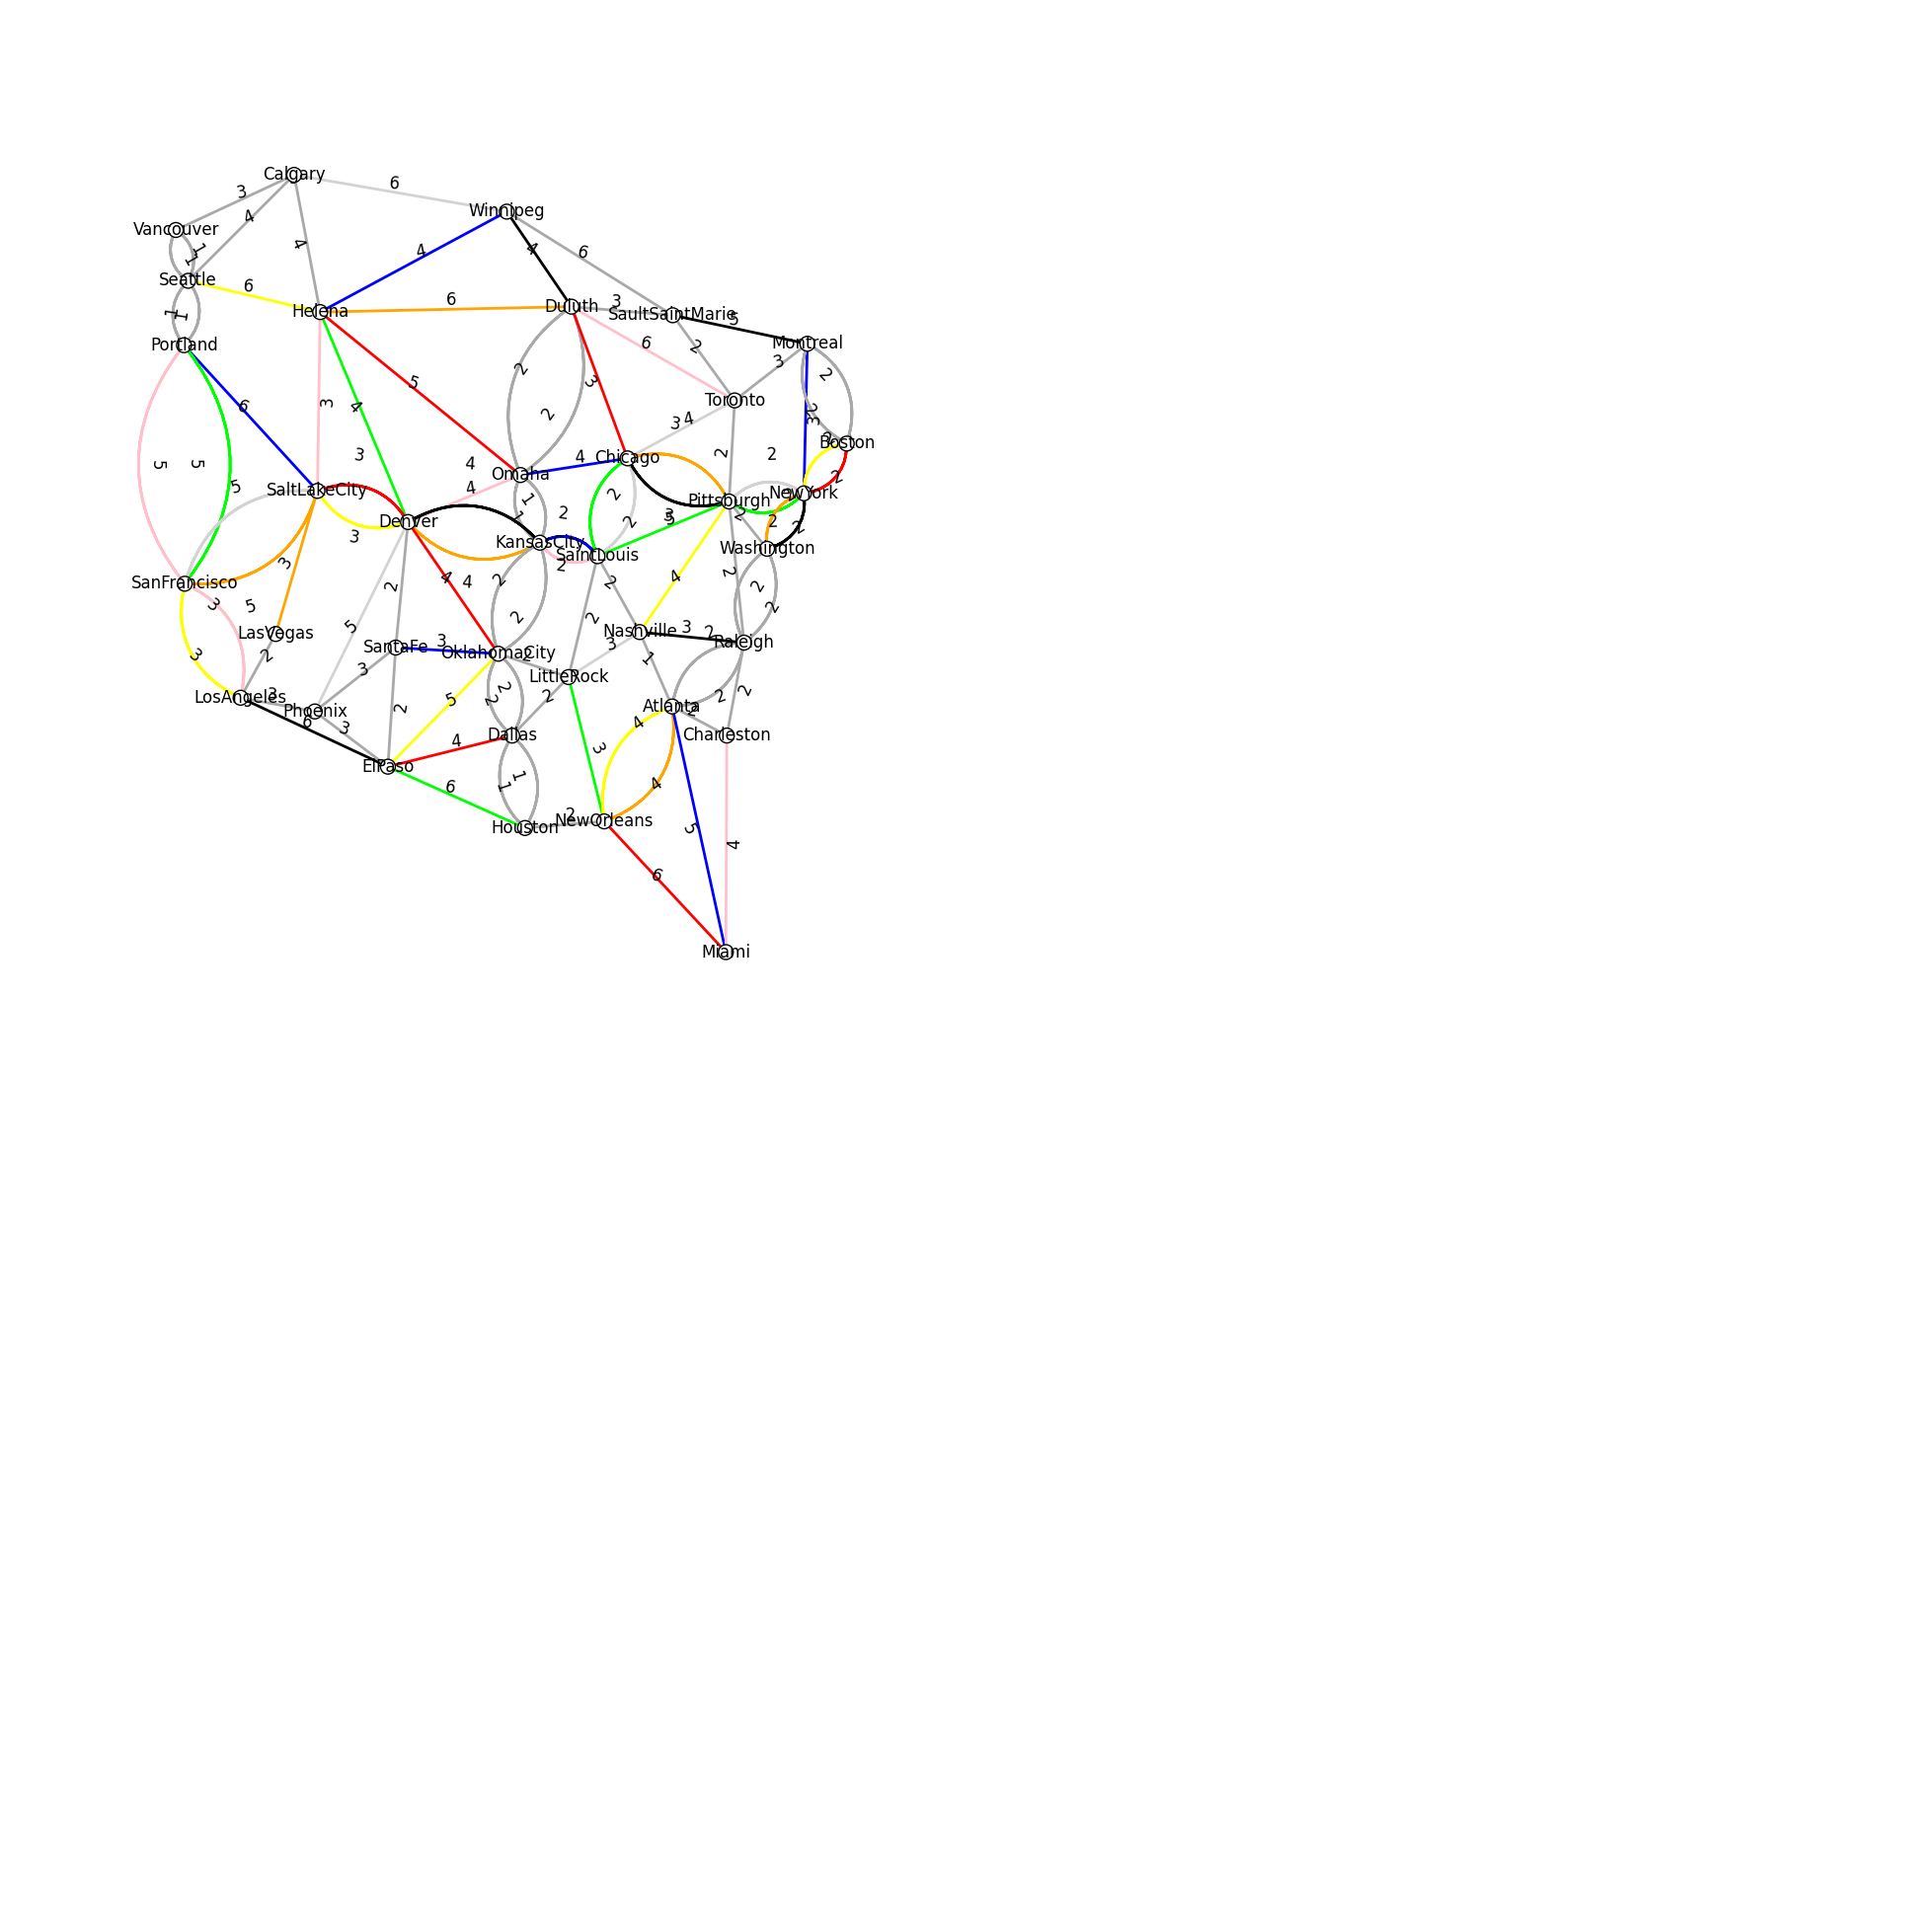

In [84]:
fig, axs = plt.subplots(1, 1, figsize=(25, 25))
ig.plot(g, target=axs, layout=layout,vertex_size=15,
        vertex_color="white",vertex_label=g.vs["name"],
        edge_color=g.es["Color"],edge_label=g.es["Weight"],
        edge_align_label=True)

Figuring out how many edges are related with each city

In [97]:
td1 = pd.Series(index=g.vs["name"],data=g.degree(g.vs["name"]))
print("Sum of Degrees: ", td1.sum())

Sum of Degrees:  200


In [86]:
neighList=[]

for i in g.vs["name"]:
    neighborList = g.neighbors(i)
    neighList.append(g.vs[neighborList]["name"])
    
pd.Series(index=g.vs["name"],data=neighList)

Seattle            [Vancouver, Vancouver, Calgary, Portland, Port...
Vancouver                                [Seattle, Seattle, Calgary]
Calgary                       [Seattle, Vancouver, Helena, Winnipeg]
Portland           [Seattle, Seattle, SaltLakeCity, SanFrancisco,...
SaltLakeCity       [Portland, Helena, SanFrancisco, SanFrancisco,...
Helena             [Seattle, Calgary, SaltLakeCity, Winnipeg, Den...
SanFrancisco       [Portland, Portland, SaltLakeCity, SaltLakeCit...
LosAngeles         [SanFrancisco, SanFrancisco, LasVegas, Phoenix...
LasVegas                                  [SaltLakeCity, LosAngeles]
Winnipeg                  [Calgary, Helena, Duluth, SaultSaintMarie]
Denver             [SaltLakeCity, SaltLakeCity, Helena, Phoenix, ...
Phoenix                        [LosAngeles, Denver, ElPaso, SantaFe]
ElPaso             [LosAngeles, Phoenix, SantaFe, OklahomaCity, D...
SantaFe                      [Denver, Phoenix, ElPaso, OklahomaCity]
Duluth             [Helena, Winnip

In [87]:
data1 =  data[data["Color"]!="darkgray"]
data2 = data1[data1["Color"]!="blue"]
data3 = data1[data1["Color"]!="yellow"]
data4 = data1[data1["Color"]!="green"]
data5 = data1[data1["Color"]!="pink"]
data6 = data1[data1["Color"]!="orange"]
data7 = data1[data1["Color"]!="lightgray"]
data8 = data1[data1["Color"]!="red"]
data9 = data1[data1["Color"]!="black"]

g2 = ig.Graph.DataFrame(data2, directed=False,use_vids=False)
g3 = ig.Graph.DataFrame(data3, directed=False,use_vids=False)
g4 = ig.Graph.DataFrame(data4, directed=False,use_vids=False)
g5 = ig.Graph.DataFrame(data5, directed=False,use_vids=False)
g6 = ig.Graph.DataFrame(data6, directed=False,use_vids=False)
g7 = ig.Graph.DataFrame(data7, directed=False,use_vids=False)
g8 = ig.Graph.DataFrame(data8, directed=False,use_vids=False)
g9 = ig.Graph.DataFrame(data9, directed=False,use_vids=False)

In [88]:
print(set(g.vs["name"]).difference(set(g2.vs["name"])))
print(set(g.vs["name"]).difference(set(g3.vs["name"])))
print(set(g.vs["name"]).difference(set(g4.vs["name"])))
print(set(g.vs["name"]).difference(set(g5.vs["name"])))
print(set(g.vs["name"]).difference(set(g6.vs["name"])))
print(set(g.vs["name"]).difference(set(g7.vs["name"])))
print(set(g.vs["name"]).difference(set(g8.vs["name"])))
print(set(g.vs["name"]).difference(set(g9.vs["name"])))

{'SantaFe', 'Vancouver'}
{'Seattle', 'Vancouver'}
{'Houston', 'Vancouver'}
{'Charleston', 'Vancouver'}
{'LasVegas', 'Vancouver'}
{'Calgary', 'Phoenix', 'Vancouver'}
{'Dallas', 'Vancouver'}
{'Raleigh', 'SaultSaintMarie', 'Vancouver'}


In [125]:
for i in set(g.vs["name"]).difference(set(g2.vs["name"])):
    g2.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g3.vs["name"])):
    g3.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g4.vs["name"])):
    g4.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g5.vs["name"])):
    g5.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g6.vs["name"])):
    g6.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g7.vs["name"])):
    g7.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g8.vs["name"])):
    g8.add_vertex(i)

for i in set(g.vs["name"]).difference(set(g9.vs["name"])):
    g9.add_vertex(i)

ANSWERS TO Q2:
a) lightgray (15)
b) yellow (9)
c) red (16)

DEMONSTRATED BELOW

In [134]:
td2 = pd.Series(index=g2.vs["name"],data=g2.degree(g2.vs["name"]))
td3 = pd.Series(index=g3.vs["name"],data=g3.degree(g3.vs["name"]))
td4 = pd.Series(index=g4.vs["name"],data=g4.degree(g4.vs["name"]))
td5 = pd.Series(index=g5.vs["name"],data=g5.degree(g5.vs["name"]))
td6 = pd.Series(index=g6.vs["name"],data=g6.degree(g6.vs["name"]))
td7 = pd.Series(index=g7.vs["name"],data=g7.degree(g7.vs["name"]))
td8 = pd.Series(index=g8.vs["name"],data=g8.degree(g8.vs["name"]))
td9 = pd.Series(index=g9.vs["name"],data=g9.degree(g9.vs["name"]))

print("Sum of Degrees - blue: ", td2.sum())
print("Sum of Degrees: - yellow ", td3.sum())
print("Sum of Degrees: - green ", td4.sum())
print("Sum of Degrees: - pink ", td5.sum())
print("Sum of Degrees: - orange ", td6.sum())
print("Sum of Degrees: - lightgray ", td7.sum())
print("Sum of Degrees: - red ", td8.sum())
print("Sum of Degrees: - black ", td9.sum())

Sum of Degrees - blue:  98
Sum of Degrees: - yellow  98
Sum of Degrees: - green  98
Sum of Degrees: - pink  98
Sum of Degrees: - orange  98
Sum of Degrees: - lightgray  98
Sum of Degrees: - red  98
Sum of Degrees: - black  98


In [135]:
pd.Series(index=g7.vs["name"],data=g7.connected_components("strong").membership) #Q2A

Portland           0
SaltLakeCity       0
Helena             0
Seattle            0
SanFrancisco       0
LosAngeles         0
LasVegas           0
Winnipeg           0
Denver             0
ElPaso             0
Duluth             0
Omaha              0
KansasCity         0
OklahomaCity       0
SantaFe            0
Dallas             0
Houston            0
LittleRock         1
NewOrleans         1
SaintLouis         0
Chicago            0
Toronto            0
Pittsburgh         0
Nashville          0
Atlanta            1
Miami              1
Charleston         1
Raleigh            0
NewYork            0
Washington         0
Montreal           0
SaultSaintMarie    0
Boston             0
Calgary            2
Phoenix            3
Vancouver          4
dtype: int64

In [136]:
pd.Series(index=g3.vs["name"],data=g3.connected_components("strong").membership) #Q2B

Portland           0
SaltLakeCity       0
SanFrancisco       0
LosAngeles         0
LasVegas           0
Helena             0
Calgary            0
Winnipeg           0
Denver             0
Phoenix            0
ElPaso             0
Duluth             0
Omaha              0
KansasCity         0
OklahomaCity       0
SantaFe            0
Dallas             0
Houston            0
LittleRock         1
NewOrleans         1
SaintLouis         0
Chicago            0
Toronto            0
Pittsburgh         0
Nashville          1
Atlanta            1
Miami              1
Charleston         1
Raleigh            1
NewYork            0
Washington         0
Montreal           0
SaultSaintMarie    0
Boston             0
Seattle            2
Vancouver          3
dtype: int64

In [137]:
artpoints = g9.articulation_points() #Q2C

artList=[]

for i in artpoints:
    artList.append(g9.vs[i]["name"])
    
artList

['SaltLakeCity',
 'Helena',
 'SanFrancisco',
 'Winnipeg',
 'Denver',
 'OklahomaCity',
 'ElPaso',
 'LittleRock',
 'NewOrleans',
 'Pittsburgh',
 'Nashville',
 'Miami',
 'NewYork']

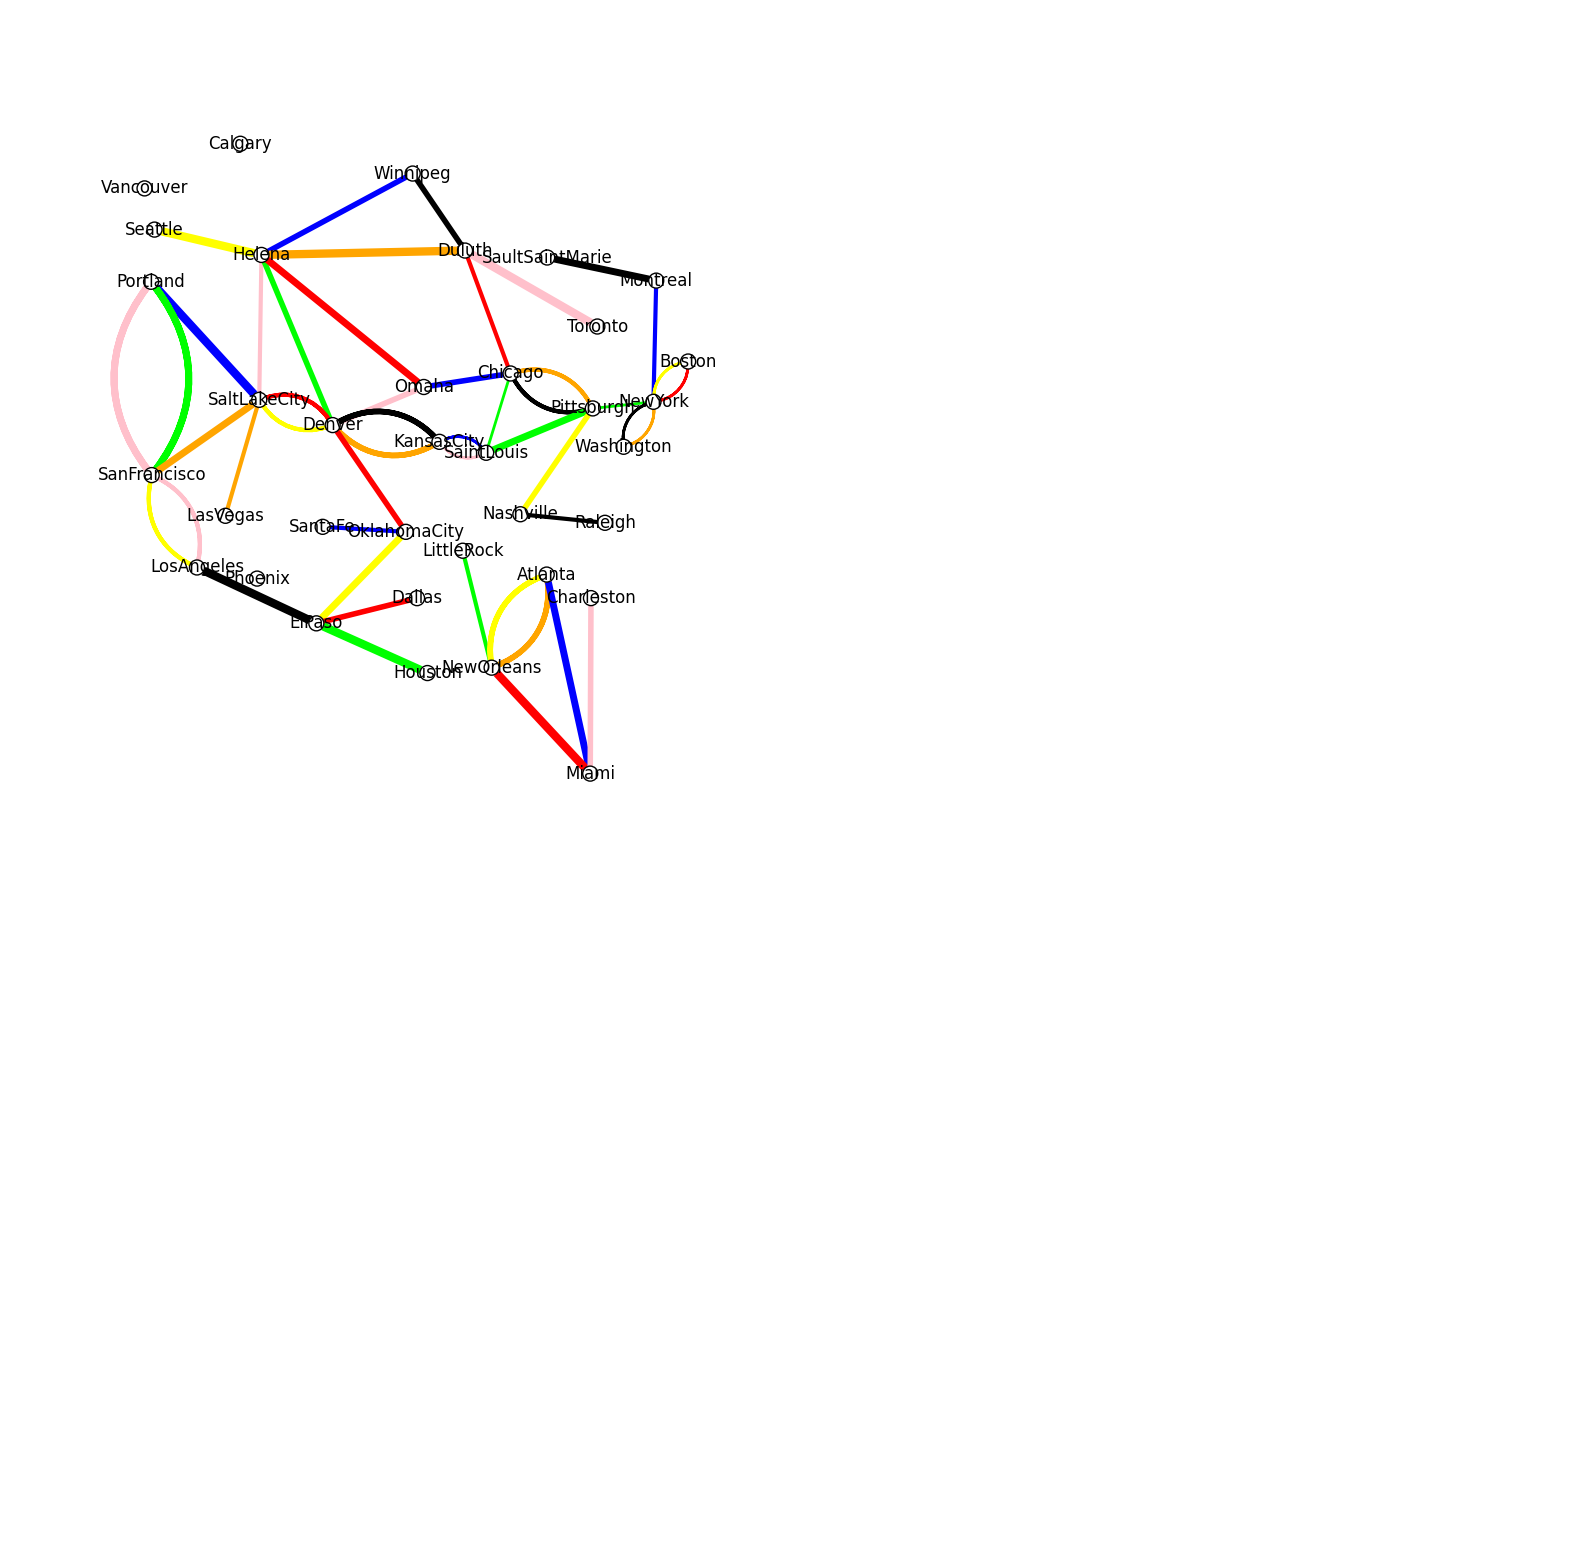

In [138]:
posList7 = [] #Q3A

for i in g7.vs:
    posList7.append(posTuple[i["name"]])
    
layout7 = ig.Layout(coords=posList7)

fig, axs = plt.subplots(1, 1, figsize=(20, 20))
ig.plot(g7, target=axs, layout=layout7,vertex_size=15,
        vertex_color="white",vertex_label=g7.vs["name"],
        edge_color=g7.es["Color"],edge_width=g7.es["Weight"]*10)

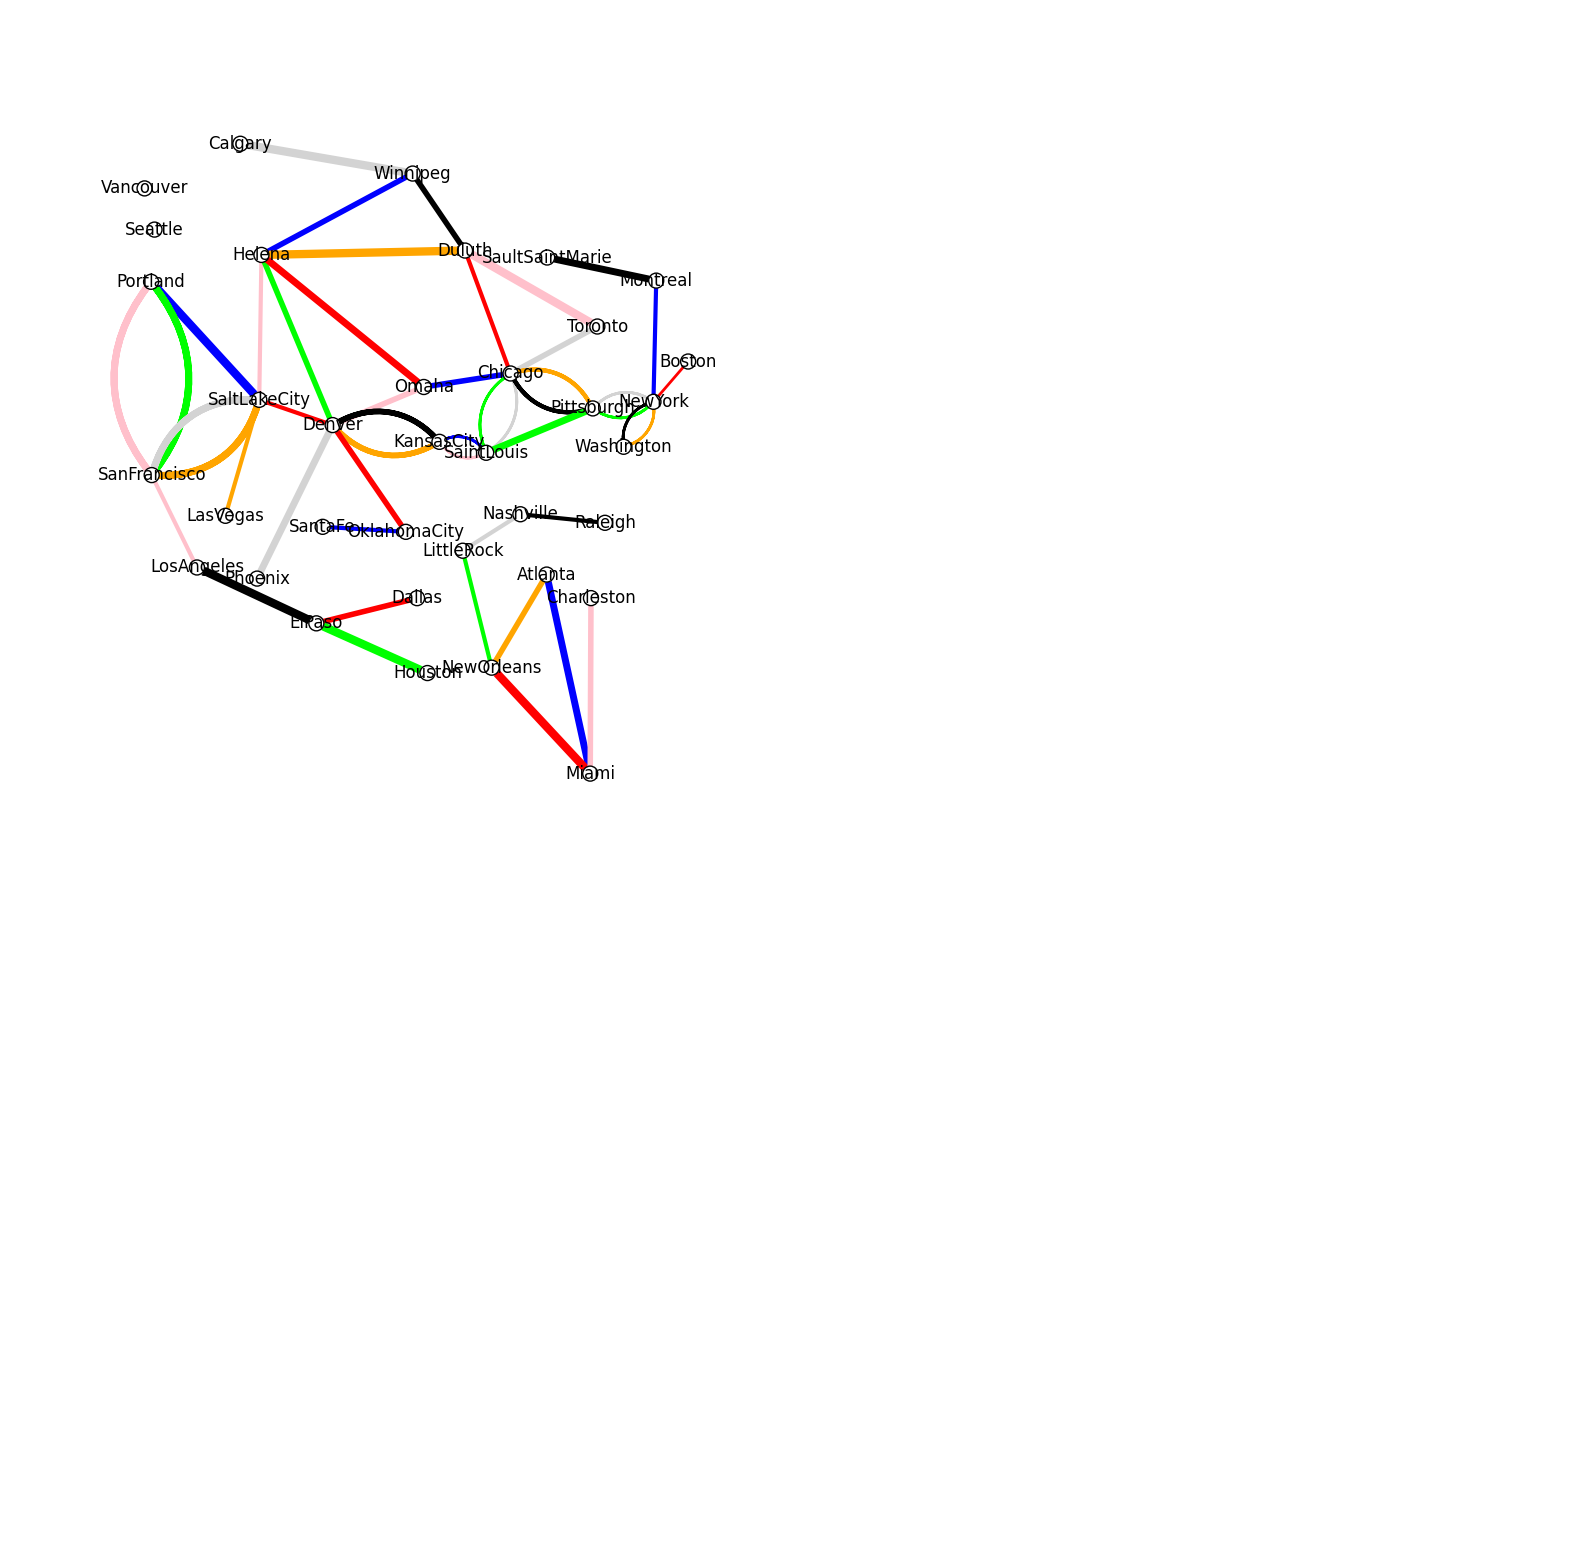

In [139]:
posList3 = [] #Q3A

for i in g3.vs:
    posList3.append(posTuple[i["name"]])
    
layout3 = ig.Layout(coords=posList3)

fig, axs = plt.subplots(1, 1, figsize=(20, 20))
ig.plot(g3, target=axs, layout=layout3,vertex_size=15,
        vertex_color="white",vertex_label=g3.vs["name"],
        edge_color=g3.es["Color"],edge_width=g3.es["Weight"]*10)

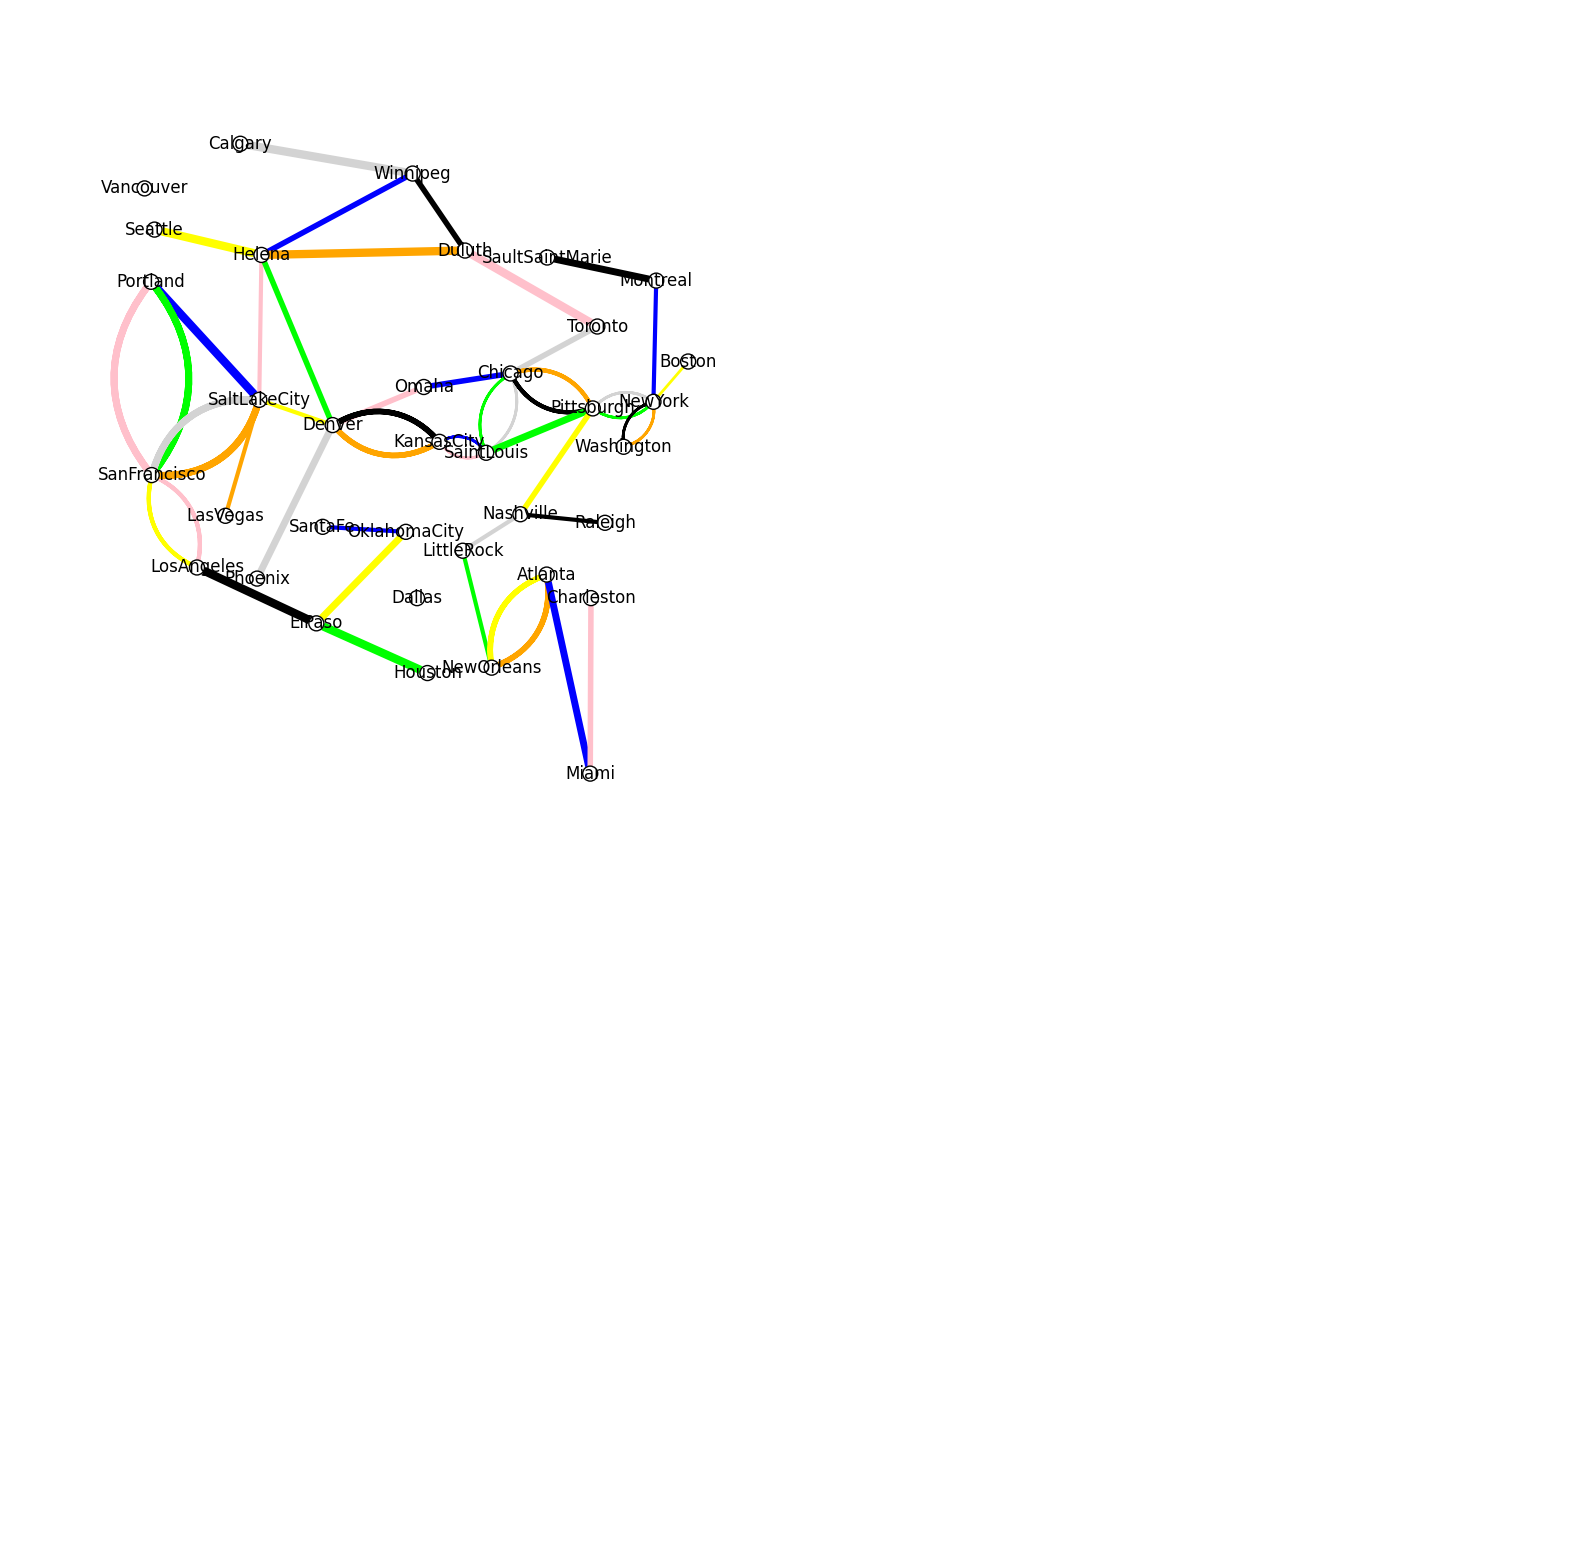

In [140]:
posList8 = [] #Q3A

for i in g8.vs:
    posList8.append(posTuple[i["name"]])
    
layout8 = ig.Layout(coords=posList8)

fig, axs = plt.subplots(1, 1, figsize=(20, 20))
ig.plot(g8, target=axs, layout=layout8,vertex_size=15,
        vertex_color="white",vertex_label=g8.vs["name"],
        edge_color=g8.es["Color"],edge_width=g8.es["Weight"]*10)

For nodes that are not connectable, the matrices respond by populating those cells with 'inf' for infinity

In [143]:
#Q4A - hops
hopsMat1=pd.DataFrame(g7.distances(),index=g7.vs["name"])
hopsMat1.columns=g7.vs["name"]

hopsMat1

,Portland,SaltLakeCity,Helena,Seattle,SanFrancisco,LosAngeles,LasVegas,Winnipeg,Denver,ElPaso,...,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Calgary,Phoenix,Vancouver
Portland,0.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,2.0,3.0,...,inf,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf,inf
SaltLakeCity,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,...,inf,6.0,5.0,6.0,6.0,7.0,6.0,inf,inf,inf
Helena,2.0,1.0,0.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,...,inf,5.0,4.0,5.0,5.0,6.0,5.0,inf,inf,inf
Seattle,3.0,2.0,1.0,0.0,3.0,4.0,3.0,2.0,2.0,4.0,...,inf,6.0,5.0,6.0,6.0,7.0,6.0,inf,inf,inf
SanFrancisco,1.0,1.0,2.0,3.0,0.0,1.0,2.0,3.0,2.0,2.0,...,inf,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf,inf
LosAngeles,2.0,2.0,3.0,4.0,1.0,0.0,3.0,4.0,3.0,1.0,...,inf,8.0,7.0,8.0,8.0,9.0,8.0,inf,inf,inf
LasVegas,2.0,1.0,2.0,3.0,2.0,3.0,0.0,3.0,2.0,4.0,...,inf,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf,inf
Winnipeg,3.0,2.0,1.0,2.0,3.0,4.0,3.0,0.0,2.0,4.0,...,inf,5.0,4.0,5.0,5.0,6.0,5.0,inf,inf,inf
Denver,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,0.0,2.0,...,inf,5.0,4.0,5.0,5.0,6.0,5.0,inf,inf,inf
ElPaso,3.0,3.0,3.0,4.0,2.0,1.0,4.0,4.0,2.0,0.0,...,inf,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf,inf


In [144]:
#Q4A - shortest disatance
distMat1=pd.DataFrame(g7.distances(weights=g7.es["Weight"]),index=g7.vs["name"])
distMat1.columns=g7.vs["name"]

distMat1

,Portland,SaltLakeCity,Helena,Seattle,SanFrancisco,LosAngeles,LasVegas,Winnipeg,Denver,ElPaso,...,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Calgary,Phoenix,Vancouver
Portland,0.0,6.0,9.0,15.0,5.0,8.0,9.0,13.0,9.0,14.0,...,inf,27.0,22.0,24.0,25.0,30.0,24.0,inf,inf,inf
SaltLakeCity,6.0,0.0,3.0,9.0,5.0,8.0,3.0,7.0,3.0,12.0,...,inf,21.0,16.0,18.0,19.0,24.0,18.0,inf,inf,inf
Helena,9.0,3.0,0.0,6.0,8.0,11.0,6.0,4.0,4.0,13.0,...,inf,19.0,14.0,16.0,17.0,22.0,16.0,inf,inf,inf
Seattle,15.0,9.0,6.0,0.0,14.0,17.0,12.0,10.0,10.0,19.0,...,inf,25.0,20.0,22.0,23.0,28.0,22.0,inf,inf,inf
SanFrancisco,5.0,5.0,8.0,14.0,0.0,3.0,8.0,12.0,8.0,9.0,...,inf,26.0,21.0,23.0,24.0,29.0,23.0,inf,inf,inf
LosAngeles,8.0,8.0,11.0,17.0,3.0,0.0,11.0,15.0,11.0,6.0,...,inf,29.0,24.0,26.0,27.0,32.0,26.0,inf,inf,inf
LasVegas,9.0,3.0,6.0,12.0,8.0,11.0,0.0,10.0,6.0,15.0,...,inf,24.0,19.0,21.0,22.0,27.0,21.0,inf,inf,inf
Winnipeg,13.0,7.0,4.0,10.0,12.0,15.0,10.0,0.0,8.0,17.0,...,inf,17.0,12.0,14.0,15.0,20.0,14.0,inf,inf,inf
Denver,9.0,3.0,4.0,10.0,8.0,11.0,6.0,8.0,0.0,9.0,...,inf,18.0,13.0,15.0,16.0,21.0,15.0,inf,inf,inf
ElPaso,14.0,12.0,13.0,19.0,9.0,6.0,15.0,17.0,9.0,0.0,...,inf,27.0,22.0,24.0,25.0,30.0,24.0,inf,inf,inf


In [145]:
#Q4B - hops
hopsMat2=pd.DataFrame(g3.distances(),index=g3.vs["name"])
hopsMat2.columns=g3.vs["name"]

hopsMat2

,Portland,SaltLakeCity,SanFrancisco,LosAngeles,LasVegas,Helena,Calgary,Winnipeg,Denver,Phoenix,...,Miami,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Seattle,Vancouver
Portland,0.0,1.0,1.0,2.0,2.0,2.0,4.0,3.0,2.0,3.0,...,inf,inf,inf,6.0,7.0,7.0,8.0,7.0,inf,inf
SaltLakeCity,1.0,0.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,...,inf,inf,inf,5.0,6.0,6.0,7.0,6.0,inf,inf
SanFrancisco,1.0,1.0,0.0,1.0,2.0,2.0,4.0,3.0,2.0,3.0,...,inf,inf,inf,6.0,7.0,7.0,8.0,7.0,inf,inf
LosAngeles,2.0,2.0,1.0,0.0,3.0,3.0,5.0,4.0,3.0,4.0,...,inf,inf,inf,7.0,8.0,8.0,9.0,8.0,inf,inf
LasVegas,2.0,1.0,2.0,3.0,0.0,2.0,4.0,3.0,2.0,3.0,...,inf,inf,inf,6.0,7.0,7.0,8.0,7.0,inf,inf
Helena,2.0,1.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,2.0,...,inf,inf,inf,4.0,5.0,5.0,6.0,5.0,inf,inf
Calgary,4.0,3.0,4.0,5.0,4.0,2.0,0.0,1.0,3.0,4.0,...,inf,inf,inf,5.0,6.0,6.0,7.0,6.0,inf,inf
Winnipeg,3.0,2.0,3.0,4.0,3.0,1.0,1.0,0.0,2.0,3.0,...,inf,inf,inf,4.0,5.0,5.0,6.0,5.0,inf,inf
Denver,2.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,0.0,1.0,...,inf,inf,inf,4.0,5.0,5.0,6.0,5.0,inf,inf
Phoenix,3.0,2.0,3.0,4.0,3.0,2.0,4.0,3.0,1.0,0.0,...,inf,inf,inf,5.0,6.0,6.0,7.0,6.0,inf,inf


In [146]:
#Q4B - shortest distance
distMat2=pd.DataFrame(g3.distances(weights=g7.es["Weight"]),index=g3.vs["name"])
distMat2.columns=g3.vs["name"]

distMat2

,Portland,SaltLakeCity,SanFrancisco,LosAngeles,LasVegas,Helena,Calgary,Winnipeg,Denver,Phoenix,...,Miami,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Seattle,Vancouver
Portland,0.0,6.0,5.0,10.0,11.0,9.0,16.0,13.0,9.0,12.0,...,inf,inf,inf,20.0,22.0,22.0,25.0,22.0,inf,inf
SaltLakeCity,6.0,0.0,3.0,8.0,5.0,3.0,10.0,7.0,3.0,6.0,...,inf,inf,inf,14.0,16.0,16.0,19.0,16.0,inf,inf
SanFrancisco,5.0,3.0,0.0,5.0,8.0,6.0,13.0,10.0,6.0,9.0,...,inf,inf,inf,17.0,19.0,19.0,22.0,19.0,inf,inf
LosAngeles,10.0,8.0,5.0,0.0,13.0,11.0,18.0,15.0,11.0,14.0,...,inf,inf,inf,22.0,24.0,24.0,27.0,24.0,inf,inf
LasVegas,11.0,5.0,8.0,13.0,0.0,8.0,15.0,12.0,8.0,11.0,...,inf,inf,inf,19.0,21.0,21.0,24.0,21.0,inf,inf
Helena,9.0,3.0,6.0,11.0,8.0,0.0,7.0,4.0,4.0,7.0,...,inf,inf,inf,12.0,14.0,14.0,17.0,14.0,inf,inf
Calgary,16.0,10.0,13.0,18.0,15.0,7.0,0.0,3.0,11.0,14.0,...,inf,inf,inf,15.0,17.0,17.0,20.0,17.0,inf,inf
Winnipeg,13.0,7.0,10.0,15.0,12.0,4.0,3.0,0.0,8.0,11.0,...,inf,inf,inf,12.0,14.0,14.0,17.0,14.0,inf,inf
Denver,9.0,3.0,6.0,11.0,8.0,4.0,11.0,8.0,0.0,3.0,...,inf,inf,inf,11.0,13.0,13.0,16.0,13.0,inf,inf
Phoenix,12.0,6.0,9.0,14.0,11.0,7.0,14.0,11.0,3.0,0.0,...,inf,inf,inf,14.0,16.0,16.0,19.0,16.0,inf,inf


In [147]:
#Q4C - hops
hopsMat3=pd.DataFrame(g8.distances(),index=g8.vs["name"])
hopsMat3.columns=g8.vs["name"]

hopsMat3

,Portland,SaltLakeCity,Helena,Seattle,SanFrancisco,LosAngeles,LasVegas,Calgary,Winnipeg,Denver,...,Miami,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Dallas,Vancouver
Portland,0.0,1.0,2.0,3.0,1.0,2.0,2.0,4.0,3.0,2.0,...,10.0,11.0,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf
SaltLakeCity,1.0,0.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,...,9.0,10.0,6.0,5.0,6.0,6.0,7.0,6.0,inf,inf
Helena,2.0,1.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,...,9.0,10.0,6.0,5.0,6.0,6.0,7.0,6.0,inf,inf
Seattle,3.0,2.0,1.0,0.0,3.0,4.0,3.0,3.0,2.0,2.0,...,10.0,11.0,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf
SanFrancisco,1.0,1.0,2.0,3.0,0.0,1.0,2.0,4.0,3.0,2.0,...,10.0,11.0,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf
LosAngeles,2.0,2.0,3.0,4.0,1.0,0.0,3.0,5.0,4.0,3.0,...,11.0,12.0,8.0,7.0,8.0,8.0,9.0,8.0,inf,inf
LasVegas,2.0,1.0,2.0,3.0,2.0,3.0,0.0,4.0,3.0,2.0,...,10.0,11.0,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf
Calgary,4.0,3.0,2.0,3.0,4.0,5.0,4.0,0.0,1.0,3.0,...,10.0,11.0,7.0,6.0,7.0,7.0,8.0,7.0,inf,inf
Winnipeg,3.0,2.0,1.0,2.0,3.0,4.0,3.0,1.0,0.0,2.0,...,9.0,10.0,6.0,5.0,6.0,6.0,7.0,6.0,inf,inf
Denver,2.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,0.0,...,8.0,9.0,5.0,4.0,5.0,5.0,6.0,5.0,inf,inf


In [152]:
#Q4C - shortest distance
distMat3=pd.DataFrame(g8.distances(weights=g8.es["Weight"]),index=g8.vs["name"])
distMat3.columns=g8.vs["name"]

distMat3

,Portland,SaltLakeCity,Helena,Seattle,SanFrancisco,LosAngeles,LasVegas,Calgary,Winnipeg,Denver,...,Miami,Charleston,Raleigh,NewYork,Washington,Montreal,SaultSaintMarie,Boston,Dallas,Vancouver
Portland,0.0,6.0,9.0,15.0,5.0,8.0,9.0,19.0,13.0,9.0,...,39.0,43.0,27.0,22.0,24.0,25.0,30.0,24.0,inf,inf
SaltLakeCity,6.0,0.0,3.0,9.0,5.0,8.0,3.0,13.0,7.0,3.0,...,33.0,37.0,21.0,16.0,18.0,19.0,24.0,18.0,inf,inf
Helena,9.0,3.0,0.0,6.0,8.0,11.0,6.0,10.0,4.0,4.0,...,34.0,38.0,22.0,17.0,19.0,20.0,25.0,19.0,inf,inf
Seattle,15.0,9.0,6.0,0.0,14.0,17.0,12.0,16.0,10.0,10.0,...,40.0,44.0,28.0,23.0,25.0,26.0,31.0,25.0,inf,inf
SanFrancisco,5.0,5.0,8.0,14.0,0.0,3.0,8.0,18.0,12.0,8.0,...,38.0,42.0,26.0,21.0,23.0,24.0,29.0,23.0,inf,inf
LosAngeles,8.0,8.0,11.0,17.0,3.0,0.0,11.0,21.0,15.0,11.0,...,41.0,45.0,29.0,24.0,26.0,27.0,32.0,26.0,inf,inf
LasVegas,9.0,3.0,6.0,12.0,8.0,11.0,0.0,16.0,10.0,6.0,...,36.0,40.0,24.0,19.0,21.0,22.0,27.0,21.0,inf,inf
Calgary,19.0,13.0,10.0,16.0,18.0,21.0,16.0,0.0,6.0,14.0,...,42.0,46.0,30.0,25.0,27.0,28.0,33.0,27.0,inf,inf
Winnipeg,13.0,7.0,4.0,10.0,12.0,15.0,10.0,6.0,0.0,8.0,...,36.0,40.0,24.0,19.0,21.0,22.0,27.0,21.0,inf,inf
Denver,9.0,3.0,4.0,10.0,8.0,11.0,6.0,14.0,8.0,0.0,...,30.0,34.0,18.0,13.0,15.0,16.0,21.0,15.0,inf,inf


QUESTION 5: I chose to remove pink

In [153]:
data10 =  data[data["Color"]!="pink"]
g10 = ig.Graph.DataFrame(data10, directed=False,use_vids=False)

#Q5A
pd.Series(index=g.vs["name"],data=g.degree(g.vs["name"])) - pd.Series(index=g10.vs["name"],data=g10.degree(g10.vs["name"]))

Seattle            0
Vancouver          0
Calgary            0
Portland           1
SaltLakeCity       1
Helena             1
SanFrancisco       2
LosAngeles         1
LasVegas           0
Winnipeg           0
Denver             1
Phoenix            0
ElPaso             0
SantaFe            0
Duluth             1
Omaha              1
KansasCity         1
OklahomaCity       0
Dallas             0
Houston            0
NewOrleans         0
LittleRock         0
SaintLouis         1
Chicago            0
SaultSaintMarie    0
Toronto            1
Pittsburgh         0
Nashville          0
Atlanta            0
Miami              1
Charleston         1
Raleigh            0
Washington         0
NewYork            0
Montreal           0
Boston             0
dtype: int64

In [155]:
#Q5B

hopsMat4=pd.DataFrame(g.distances(),index=g.vs["name"])
hopsMat4.columns=g.vs["name"]

hopsMat5=pd.DataFrame(g10.distances(),index=g10.vs["name"])
hopsMat5.columns=g10.vs["name"]

hopsMat4 - hopsMat5

,Seattle,Vancouver,Calgary,Portland,SaltLakeCity,Helena,SanFrancisco,LosAngeles,LasVegas,Winnipeg,...,Pittsburgh,Nashville,Atlanta,Miami,Charleston,Raleigh,Washington,NewYork,Montreal,Boston
Seattle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vancouver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calgary,0,0,0,0,-1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
Portland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SaltLakeCity,0,0,-1,0,0,-1,0,0,0,-1,...,0,0,0,0,0,0,0,0,-1,-1
Helena,0,0,0,0,-1,0,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
SanFrancisco,0,0,0,0,0,-1,0,0,0,-1,...,0,0,0,0,0,0,0,0,-1,-1
LosAngeles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LasVegas,0,0,-1,0,0,-1,0,0,0,-1,...,0,0,0,0,0,0,0,0,-1,-1
Winnipeg,0,0,0,0,-1,0,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
#Q5C

distMat4=pd.DataFrame(g.distances(weights=g.es["Weight"]),index=g.vs["name"])
distMat4.columns=g.vs["name"]

distMat5=pd.DataFrame(g10.distances(weights=g10.es["Weight"]),index=g10.vs["name"])
distMat5.columns=g10.vs["name"]

distMat4 - distMat5

,Seattle,Vancouver,Calgary,Portland,SaltLakeCity,Helena,SanFrancisco,LosAngeles,LasVegas,Winnipeg,...,Pittsburgh,Nashville,Atlanta,Miami,Charleston,Raleigh,Washington,NewYork,Montreal,Boston
Seattle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vancouver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calgary,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,-1.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Portland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaltLakeCity,0.0,0.0,-4.0,0.0,0.0,-4.0,0.0,0.0,0.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
Helena,0.0,0.0,0.0,0.0,-4.0,0.0,-4.0,-4.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SanFrancisco,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
LosAngeles,0.0,0.0,-1.0,0.0,0.0,-4.0,0.0,0.0,0.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LasVegas,0.0,0.0,-4.0,0.0,0.0,-4.0,0.0,0.0,0.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
Winnipeg,0.0,0.0,0.0,0.0,-4.0,0.0,-4.0,-4.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


QUESTION 6

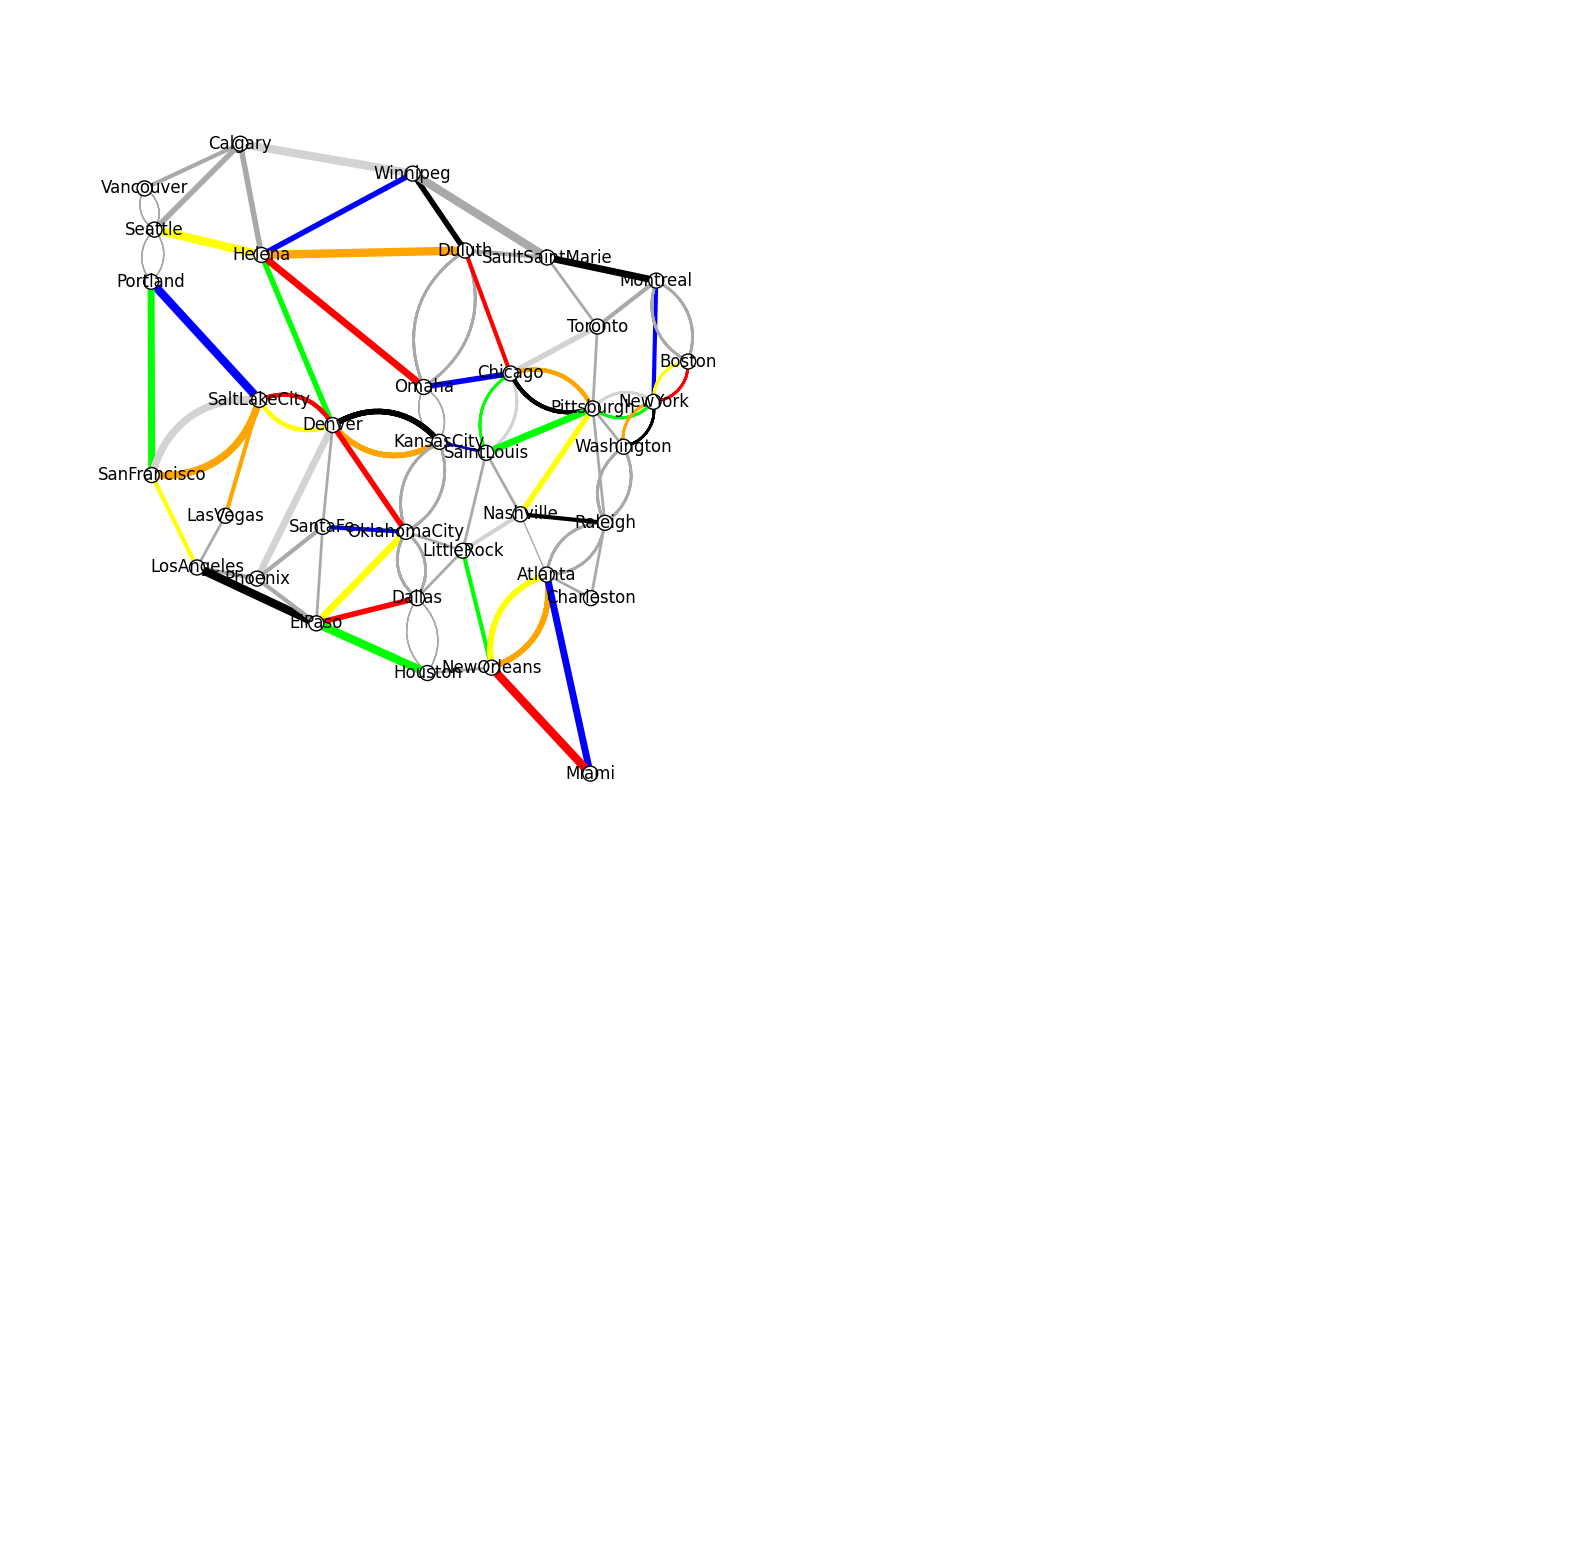

In [156]:
posList10 = []

for i in g10.vs:
    posList10.append(posTuple[i["name"]])
    
layout10 = ig.Layout(coords=posList10)

fig, axs = plt.subplots(1, 1, figsize=(20, 20))
ig.plot(g10, target=axs, layout=layout10,vertex_size=15,
        vertex_color="white",vertex_label=g10.vs["name"],
        edge_color=g10.es["Color"],edge_width=g10.es["Weight"]*10)